In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
path1 = './first_frame.png'
path2 = './second_frame.png'

frame1 = Image.open(path1).convert("L")
frame2 = Image.open(path2).convert("L")
frame1 = np.array(frame1, dtype = float)
frame2 = np.array(frame2, dtype = float)

In [3]:
# Plotter function 

def plot_img(images, rows, cols, figsize=(10, 10), titles=None, sup_title=None):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    if sup_title is not None:
        fig.suptitle(sup_title)
    axes = axes.ravel()

    for i in range(rows*cols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].axis('off')

        if titles is not None:
            axes[i].set_title(titles[i])
    plt.show()

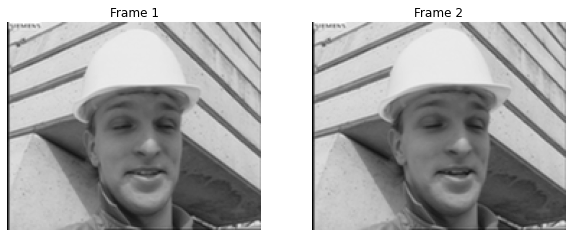

In [4]:
plot_img([frame1, frame2], 1, 2, titles=['Frame 1', 'Frame 2'])

# 1.  Motion Estimation

In [5]:
# Returns a list containing image patches of specified size
def patchify(img, patch_size=16):
    patches = []
    m, n = img.shape
    for i in range(0, m, patch_size):
        for j in range(0, n, patch_size):
            center = (i + patch_size // 2, j + patch_size // 2)
            patches.append([np.array(center), img[i:i+patch_size, j:j+patch_size]])
            # print(j)
    return patches

In [6]:
m, n = frame1.shape
x_blocks = m // 16
y_blocks = n // 16

In [7]:
def img_from_patches(patch_list, dim, patch_size=16):
    m, n = dim
    img_rec = np.zeros((m,n))

    patch_counter = 0
    for i in range(0, m, patch_size):
        for j in range(0, n, patch_size):
            img_rec[i:i+patch_size, j:j+patch_size] = patch_list[patch_counter]
            patch_counter += 1

    return img_rec

In [8]:
def compute_motion_vectors(frame1, frame2, size=16):
    m, n = frame1.shape
    search_distance = [4, 2, 1]
    blocks = patchify(frame2)

    for step in range(3):
        for block in blocks:
            minMAD = np.inf
            i = block[0][0]
            j = block[0][1]
     
            for k in range(i - search_distance[step], i + search_distance[step] + 1, search_distance[step]):
                    for l in range(j - search_distance[step], j + search_distance[step] + 1, search_distance[step]):
                        if (k >= size//2 and k < m+1-size//2 and l >= size//2 and l < n+1-size//2):
                            MAD = np.sum(np.absolute(block[1] - frame1[k-size//2:k+size//2, l-size//2:l+size//2]))/(size*size)
                            if MAD <= minMAD:
                                minMAD = MAD
                                block[0][0] = k
                                block[0][1] = l
    return blocks

In [9]:
macroblocks = patchify(frame2)
b3 = compute_motion_vectors(frame1, frame2)

In [10]:

final_coords = np.zeros((len(macroblocks), 2))
initial_coords = np.zeros((len(macroblocks), 2))
for i in range(len(macroblocks)):
    final_coords[i] = b3[i][0]
    initial_coords[i] = macroblocks[i][0]


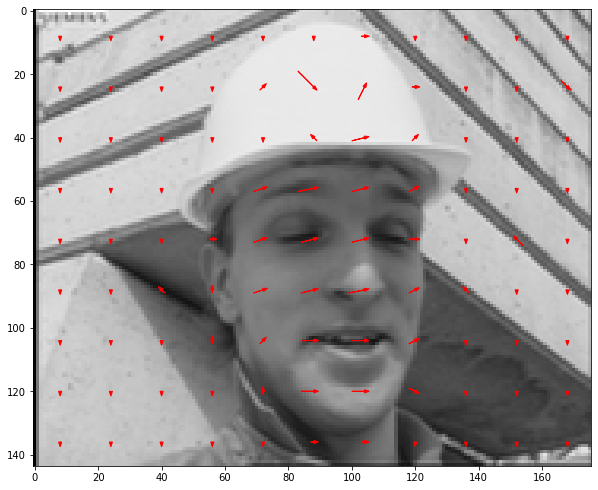

In [11]:

# plot the second frame and its motion vectors
plt.figure(figsize = (10, 10))
for i in range(len(final_coords)):
    plt.arrow(final_coords[i][1], final_coords[i][0], 
              -final_coords[i][1]+initial_coords[i][1], -final_coords[i][0]+initial_coords[i][0], 
              color='red', head_width=1, head_length=1.5)
plt.imshow(frame2, cmap='gray')
plt.show()


In [12]:
# def compute_motion_vectors(frame1, frame2_blocks, size=16):
#     m, n = frame1.shape
#     search_distance = [4, 2, 1]
#     blocks = frame2_blocks
#     for step in range(3):
#         for counter in range(len(blocks)):
#             minMAD = np.inf
#             i = blocks[counter][0][0] - size // 2
#             j = blocks[counter][0][1] - size // 2
#             block = blocks[counter][1]
#             for k in range(i - search_distance[step], i + search_distance[step] + 1, search_distance[step]):
#                     for l in range(j - search_distance[step], j + search_distance[step] + 1, search_distance[step]):
#                         if (k >=0 and k+size-1 < m and l >=0 and l+size-1 < n and k < m and l < n):
#                             # print(k, l)
#                             MAD = np.sum(np.abs(block[counter][1] - frame1[k:k+size, l:l+size]))/(size*size)
#                             if MAD <= minMAD :
#                                 minMAD = MAD
#                                 blocks[counter][0] = (k + size // 2, l + size // 2)
#     return blocks

In [13]:
search_distance = [4, 2, 1]
step = 2
for di in range(-search_distance[step], search_distance[step] + 1, search_distance[step]):
    for dj in range(-search_distance[step], search_distance[step] + 1, search_distance[step]):
        print(di, dj)

-1 -1
-1 0
-1 1
0 -1
0 0
0 1
1 -1
1 0
1 1
